,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2/24/2015 22:55,4/18/2015 2:47,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,6/7/2015 20:39,6/8/2015 1:38,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,1/1/2015 18:52,1/1/2015 18:52,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,4/28/2015 21:13,5/4/2015 13:54,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,7/21/2015 7:09,9/9/2015 18:40,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


Shape of fraud dataset: (151112, 11)

Data Types:
 user_id             int64
signup_time        object
purchase_time      object
purchase_value      int64
device_id          object
source             object
browser            object
sex                object
age                 int64
ip_address        float64
class               int64
dtype: object

Missing Values:
 user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64

Duplicate Rows: 0

Fraud Class Counts:
 class
0    136961
1     14151
Name: count, dtype: int64

Fraud Class Percentages:
 class
0    90.635423
1     9.364577
Name: proportion, dtype: float64


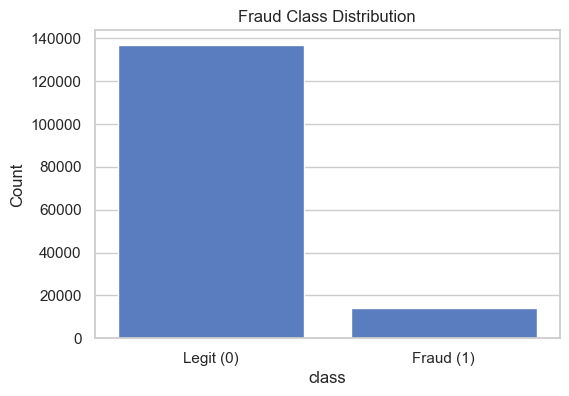

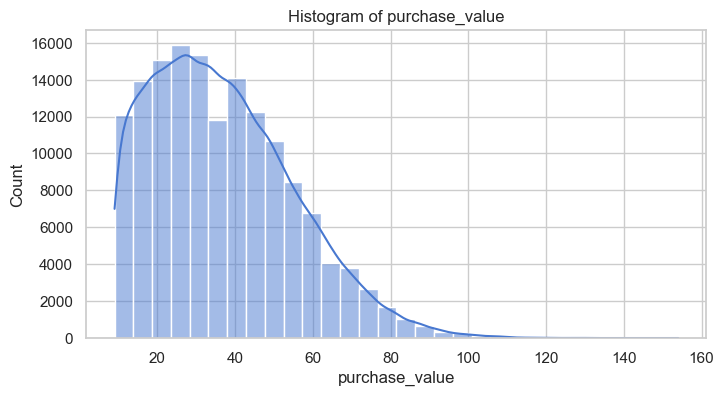

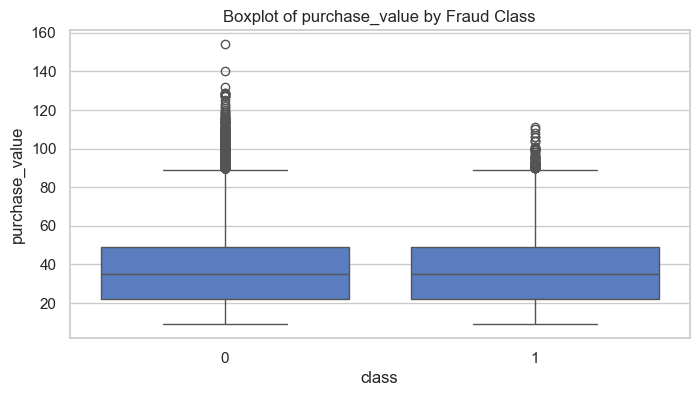

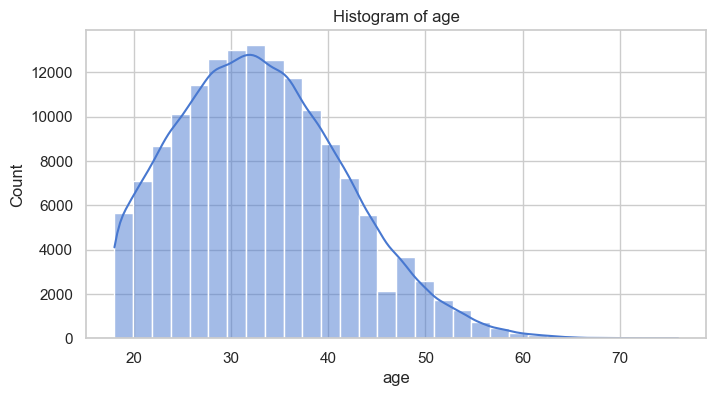

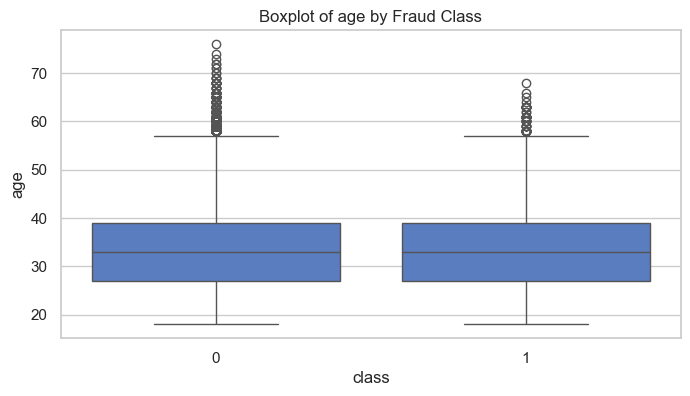

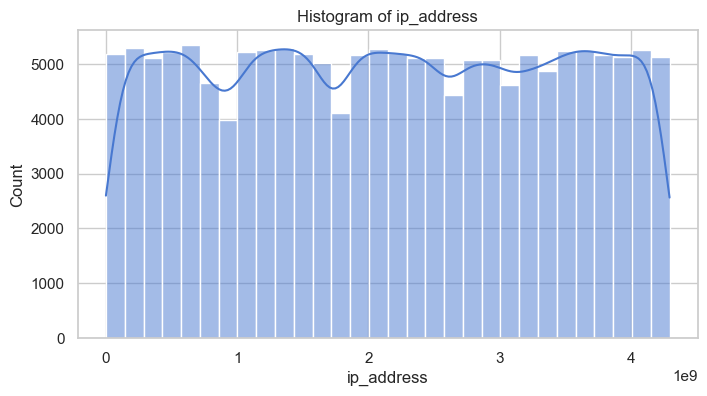

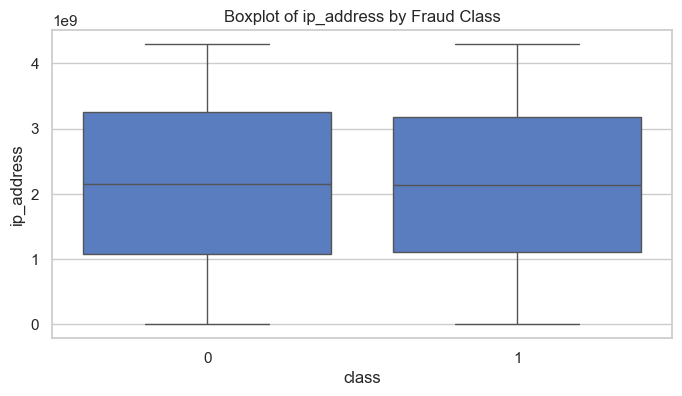

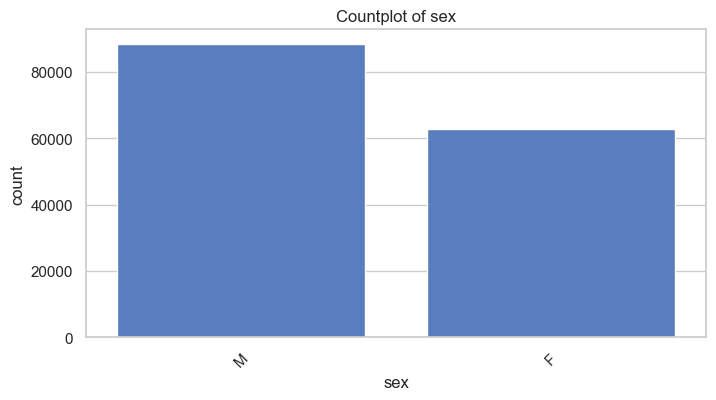

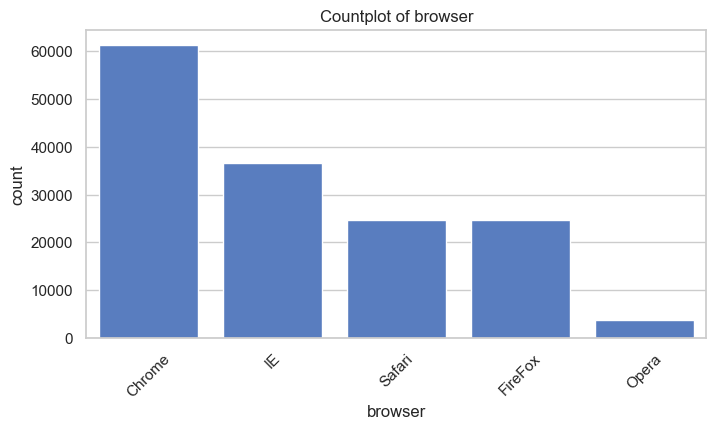

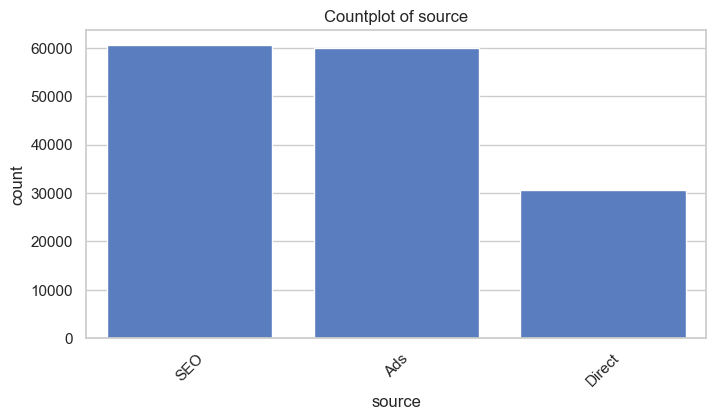

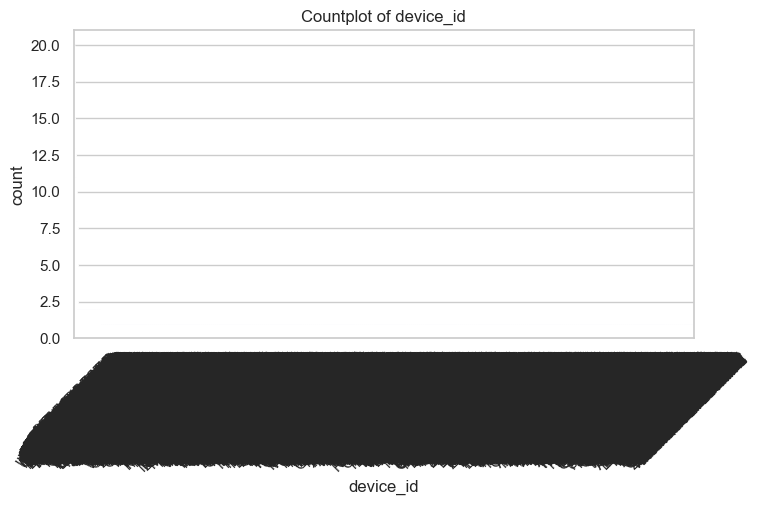

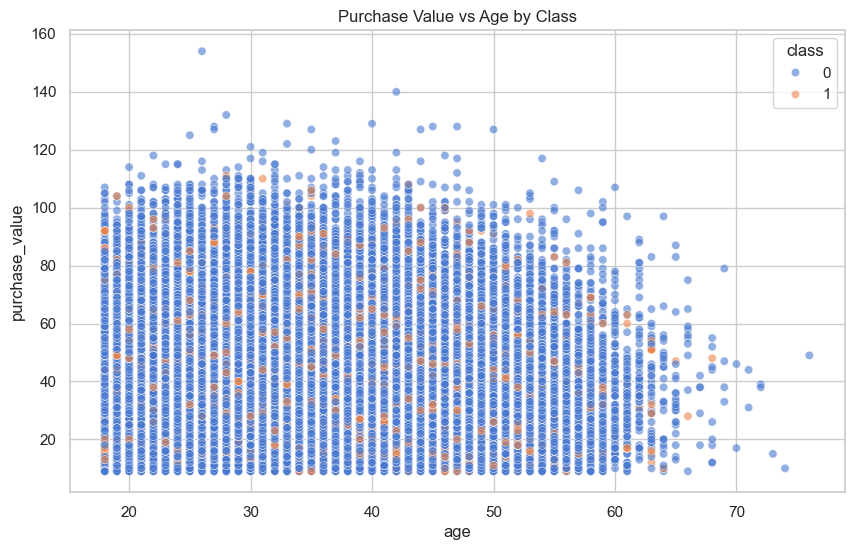

class,0,1
sex,,
F,0.908993,0.091007
M,0.904477,0.095523


class,0,1
browser,,
Chrome,0.901208,0.098792
FireFox,0.904835,0.095165
IE,0.913225,0.086775
Opera,0.910773,0.089227
Safari,0.909799,0.090201


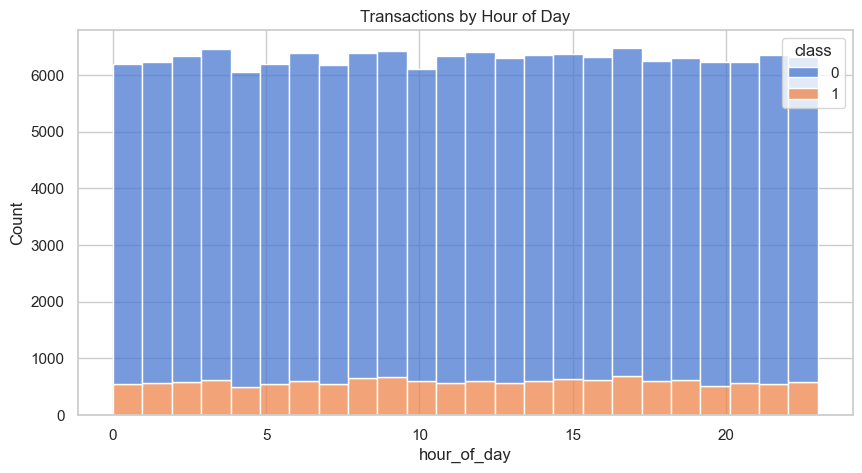

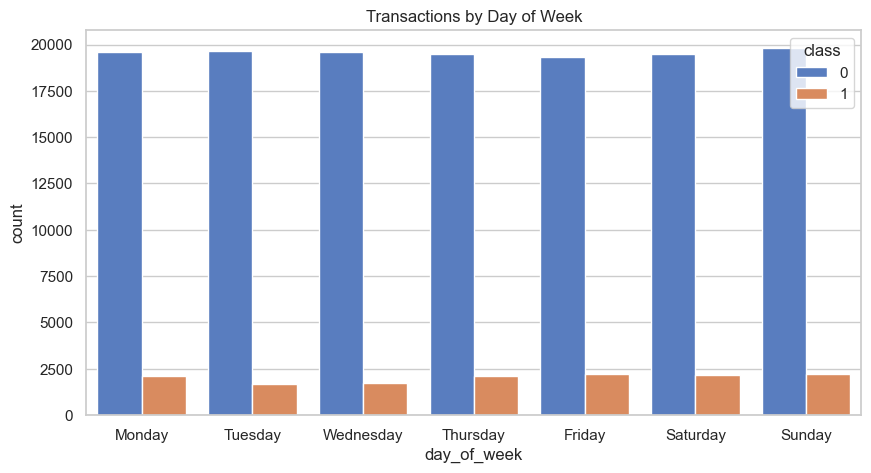

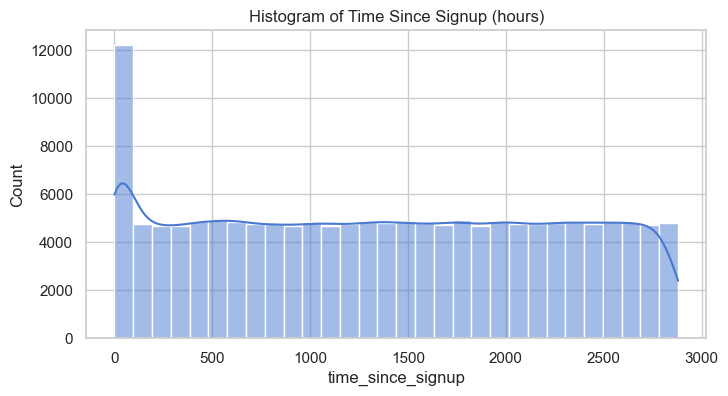

In [ ]:
# eda_fraud_data.ipynb

# -----------------------------
# 1. Import Libraries
# -----------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

sns.set(style="whitegrid", palette="muted")
pd.set_option("display.max_columns", None)

# -----------------------------
# 2. Load Data
# -----------------------------
fraud_df = pd.read_csv("../data/raw/fraud_data.csv")
ip_df = pd.read_csv("../data/raw/ip.csv")

# Quick glance
display(fraud_df.head())
display(ip_df.head())

# -----------------------------
# 3. Data Overview
# -----------------------------
print("Shape of fraud dataset:", fraud_df.shape)
print("\nData Types:\n", fraud_df.dtypes)
print("\nMissing Values:\n", fraud_df.isna().sum())
print("\nDuplicate Rows:", fraud_df.duplicated().sum())

# -----------------------------
# 4. Target Variable Analysis
# -----------------------------
target_counts = fraud_df['class'].value_counts()
target_percent = fraud_df['class'].value_counts(normalize=True) * 100
print("\nFraud Class Counts:\n", target_counts)
print("\nFraud Class Percentages:\n", target_percent)

plt.figure(figsize=(6,4))
sns.barplot(x=target_counts.index, y=target_counts.values)
plt.title("Fraud Class Distribution")
plt.xticks([0,1], ['Legit (0)', 'Fraud (1)'])
plt.ylabel("Count")
plt.show()

# -----------------------------
# 5. Univariate Analysis
# -----------------------------
numeric_features = ['purchase_value', 'age', 'ip_address']
categorical_features = ['sex', 'browser', 'source', 'device_id']

# Numeric features
for feature in numeric_features:
    plt.figure(figsize=(8,4))
    sns.histplot(fraud_df[feature], kde=True, bins=30)
    plt.title(f"Histogram of {feature}")
    plt.show()
    
    plt.figure(figsize=(8,4))
    sns.boxplot(x='class', y=feature, data=fraud_df)
    plt.title(f"Boxplot of {feature} by Fraud Class")
    plt.show()

# Categorical features
for feature in categorical_features:
    plt.figure(figsize=(8,4))
    sns.countplot(x=feature, data=fraud_df, order=fraud_df[feature].value_counts().index)
    plt.title(f"Countplot of {feature}")
    plt.xticks(rotation=45)
    plt.show()

# -----------------------------
# 6. Bivariate Analysis (Fraud vs Features)
# -----------------------------
# Scatter: purchase_value vs age colored by class
plt.figure(figsize=(10,6))
sns.scatterplot(x='age', y='purchase_value', hue='class', data=fraud_df, alpha=0.6)
plt.title("Purchase Value vs Age by Class")
plt.show()

# Crosstab: sex vs class
sex_class_ct = pd.crosstab(fraud_df['sex'], fraud_df['class'], normalize='index')
display(sex_class_ct)

# Crosstab: browser vs class
browser_class_ct = pd.crosstab(fraud_df['browser'], fraud_df['class'], normalize='index')
display(browser_class_ct)

# -----------------------------
# 7. Time-Based Analysis
# -----------------------------
# Convert timestamps
fraud_df['signup_time'] = pd.to_datetime(fraud_df['signup_time'])
fraud_df['purchase_time'] = pd.to_datetime(fraud_df['purchase_time'])

# Extract features
fraud_df['hour_of_day'] = fraud_df['purchase_time'].dt.hour
fraud_df['day_of_week'] = fraud_df['purchase_time'].dt.day_name()
fraud_df['time_since_signup'] = (fraud_df['purchase_time'] - fraud_df['signup_time']).dt.total_seconds() / 3600

# Plot hour distribution
plt.figure(figsize=(10,5))
sns.histplot(fraud_df, x='hour_of_day', hue='class', multiple='stack', bins=24)
plt.title("Transactions by Hour of Day")
plt.show()

# Plot day of week distribution
plt.figure(figsize=(10,5))
sns.countplot(x='day_of_week', hue='class', data=fraud_df,
              order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title("Transactions by Day of Week")
plt.show()

# Time since signup
plt.figure(figsize=(8,4))
sns.histplot(fraud_df['time_since_signup'], kde=True, bins=30)
plt.title("Histogram of Time Since Signup (hours)")
plt.show()

# -----------------------------
# 8. IP → Country Analysis
# -----------------------------
# Convert IP to integer range matching
fraud_df['ip_address'] = fraud_df['ip_address'].astype(int)
ip_df['lower_bound_ip_address'] = ip_df['lower_bound_ip_address'].astype(int)
ip_df['upper_bound_ip_address'] = ip_df['upper_bound_ip_address'].astype(int)

# Example merge (range join) — using simple approximation here
# Note: For large datasets, use interval trees for efficiency
fraud_df['country'] = 'Unknown'
for i, row in ip_df.iterrows():
    mask = (fraud_df['ip_address'] >= row['lower_bound_ip_address']) & \
           (fraud_df['ip_address'] <= row['upper_bound_ip_address'])
    fraud_df.loc[mask, 'country'] = row['country']

# Country-wise fraud counts
plt.figure(figsize=(12,6))
country_counts = fraud_df.groupby('country')['class'].sum().sort_values(ascending=False)
sns.barplot(x=country_counts.index, y=country_counts.values)
plt.title("Fraud Transactions by Country")
plt.xticks(rotation=45)
plt.ylabel("Number of Fraud Cases")
plt.show()

# -----------------------------
# 9. Correlation Heatmap (Numeric Features)
# -----------------------------
plt.figure(figsize=(10,8))
num_features_for_corr = ['purchase_value','age','ip_address','hour_of_day','time_since_signup']
sns.heatmap(fraud_df[num_features_for_corr].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Key Numeric Features")
plt.show()




# EDA Insights for `fraud_data.csv`

## 1. Data Types and Cleaning Needs
- `purchase_time` is currently an object; it should be converted to `datetime` for proper temporal analysis.
- `ip_address` is a float; it will be converted to integer for country mapping.
- There are **no missing values** in the dataset.
- Duplicate rows were checked and none were found.

## 2. Dataset Overview
- The dataset contains **151,112 rows and 11 columns**.
- The target variable `class` is **highly imbalanced**:
  - 90.6% of transactions are non-fraud (`0`)  
  - 9.4% of transactions are fraudulent (`1`)  

## 3. Univariate Analysis
- **Purchase Value**: Right-skewed distribution; most transactions are low-value, few high-value outliers.
- **Age**: Roughly normal distribution.  
  - Non-fraud (`0`): ages mainly 25–40  
  - Fraud (`1`): ages mainly 25–40, with outliers in both groups.
- **Sex Distribution**:  
  - Female: ~60,000  
  - Male: ~90,000  
- **Browser Usage**: Chrome most common, Opera least used.
- **Traffic Source**: SEO is top, Ads second.

## 4. Fraud Analysis by Demographics
- **By Sex**: Males have slightly higher fraud rate (0.095) vs females (0.091)
- **By Browser**:
  - Chrome: 0.098  
  - Safari: 0.0902  
  - Firefox: 0.095  
  - IE: 0.086  
- **By Source**: SEO and Ads are main channels for both fraud and non-fraud.

## 5. Temporal Patterns
- **Hourly Analysis**: Fraud peaks around **3 AM**, **8–9 AM**, and **5 PM**.
- **Weekly Analysis**: Fraud peaks **Friday to Sunday**, decreases **Monday to Wednesday**, rises again on **Thursday**.

## Key Takeaways
- Dataset is clean, but `purchase_time` and `ip_address` need type conversions.
- Fraud is concentrated in ages 25–40 and shows mild differences by gender and browser usage.
- Temporal patterns indicate specific high-risk hours and days.
- These insights guide **feature engineering**: create time-of-day, day-of-week, browser, and age-based features for modeling.
